In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
idx = pd.IndexSlice

# User Input

In [3]:
expert_eval_fpath ="./eval/240610_ECSS-RAG_expert_eval_anonym.xlsx"

# Load Data

In [4]:
df = pd.read_excel(expert_eval_fpath, sheet_name="q_expert_eval_anonym")

In [5]:
cnd_is_user = df['user_name'] != "YOUR FULLNAME"
cnd_is_not_example = df['user_name'] != "Michele Bernasconi"

In [6]:
# excluding examples query and dev user
df = df.loc[cnd_is_user & cnd_is_not_example, :].copy()
df

,ID,Variant,user_name,Field of expertise,your query,your expected key review points,"your expected reference docs, name and page",RAG Hyper Params,LLM response,"helpful, software dev",...,"incorrect information, dev","incorrect information, expert",completeness score,hallucinated,"comment, software dev","comment, expert",query type,answer belong to ST or HB?,source_documents,source_ref
0,1,1,Yuri Gagarin,Engineering,For which enviroment is power spectral density...,[x] mention acoustic\n[x] mention random\n[x] ...,NaN,"rag_st_k3 = rag.Rag(\n db_path="".embeddings...",The power spectral density (PSD) is relevant f...,TRUE,...,FALSE,NaN,0.428571,FALSE,example,NaN,specific,ST,[Document(page_content='NOTE 3 The power spec...,"[{'page': 15, 'source': 'ST/ECSS-E-ST-10-03-Re..."
1,2,1,Yuri Gagarin,Engineering,For which enviroment is power spectral density...,[x] reduction of input\n[x] avoid over-testing...,NaN,"rag_st_k3 = rag.Rag(\n db_path="".embeddings...",Based on the provided sections from various do...,TRUE,...,FALSE,NaN,1.000000,FALSE,example,NaN,specific,ST,[Document(page_content='3.2.14 minimum predic...,"[{'page': 15, 'source': 'ST/ECSS-E-ST-10-03-Re..."
2,3,1,Yuri Gagarin,Engineering,what is a resonance search?,[x] resonance freqs\n[x] before/after\n[x] int...,NaN,"rag_st_k3 = rag.Rag(\n db_path="".embeddings...",A resonance search is a test procedure perfor...,TRUE,...,FALSE,NaN,0.875000,FALSE,example,NaN,specific,ST,NaN,NaN
3,4,1,Neil Armstrong,Engineering,How a Residual Magnetic Moment shall be measured?,[x] ECSS Reference; ST/ECSS-E-ST-20-07C-Rev.2(...,NaN,"rag_st_k3 = rag.Rag(\n db_path="".embeddings...","The final answer to the question ""How a Residu...",TRUE,...,FALSE,NaN,0.333333,FALSE,ECSS reference not provided in the response (s...,NaN,unclear,ST,----------------------------------------------...,"[{'page': 62,\n 'source': 'ST/ECSS-E-ST-20-0..."
4,4,2,Neil Armstrong,Engineering,How a Residual Magnetic Moment shall be measured?,[x] ECSS Reference; ST/ECSS-E-ST-20-07C-Rev.2(...,NaN,"rag_st_k3_mistral = rag.Rag(\n db_path="".em...","To measure a Residual Magnetic Moment, the ECS...",TRUE,...,FALSE,NaN,0.333333,FALSE,using mistral instead of llama2; reference pro...,NaN,unclear,ST,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,64,1,YOUR NAME,NaN,YOUR QUERY,[] point 1\n[] point 2\n[] point 3\n[] point 4...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,65,1,YOUR NAME,NaN,YOUR QUERY,[] point 1\n[] point 2\n[] point 3\n[] point 4...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,66,1,YOUR NAME,NaN,YOUR QUERY,[] point 1\n[] point 2\n[] point 3\n[] point 4...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,67,1,YOUR NAME,NaN,YOUR QUERY,[] point 1\n[] point 2\n[] point 3\n[] point 4...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['ID', 'Variant', 'user_name', 'Field of expertise', 'your query',
       'your expected key review points',
       'your expected reference docs, name and page', 'RAG Hyper Params',
       'LLM response', 'helpful, software dev', 'helpful, expert',
       'incorrect information, dev', 'incorrect information, expert',
       'completeness score', 'hallucinated', 'comment, software dev',
       'comment, expert', 'query type', 'answer belong to ST or HB?',
       'source_documents', 'source_ref'],
      dtype='object')

In [8]:
df['query type'] .value_counts()

query type
specific    23
open        21
unclear     14
Name: count, dtype: int64

In [9]:
cnd_query_is_specific = df['query type'] == 'specific'
cnd_query_is_unclear = df['query type'] == 'unclear'
cnd_query_is_open = df['query type'] == 'open' 
cnd_response_is_correct = df['incorrect information, dev'] == 'FALSE' # I know, an ugly string, but there is TBC together with False/True
cnd_response_is_not_hallucinated = df['hallucinated'] == 'FALSE'


In [10]:
df[cnd_query_is_specific].groupby(['ID', 'Variant'])[['completeness score']].max().dropna().head()

completeness score
ID Variant                    
1  1                  0.428571
2  1                  1.000000
3  1                  0.875000
6  1                  0.333333
   2                  0.666667

In [11]:
df.groupby(['ID'])[['completeness score']].max().dropna().head()

,completeness score
ID,
1,0.428571
2,1.000000
3,0.875000
4,0.666667
5,0.333333


In [12]:
df[df['Variant'] == 1][['completeness score']].dropna().head()

,completeness score
0,0.428571
1,1.000000
2,0.875000
3,0.333333
9,0.000000


In [13]:
df[cnd_query_is_specific].groupby(['ID', 'Variant'])[['completeness score']].max().dropna().head()

completeness score
ID Variant                    
1  1                  0.428571
2  1                  1.000000
3  1                  0.875000
6  1                  0.333333
   2                  0.666667

In [14]:
df.columns

Index(['ID', 'Variant', 'user_name', 'Field of expertise', 'your query',
       'your expected key review points',
       'your expected reference docs, name and page', 'RAG Hyper Params',
       'LLM response', 'helpful, software dev', 'helpful, expert',
       'incorrect information, dev', 'incorrect information, expert',
       'completeness score', 'hallucinated', 'comment, software dev',
       'comment, expert', 'query type', 'answer belong to ST or HB?',
       'source_documents', 'source_ref'],
      dtype='object')

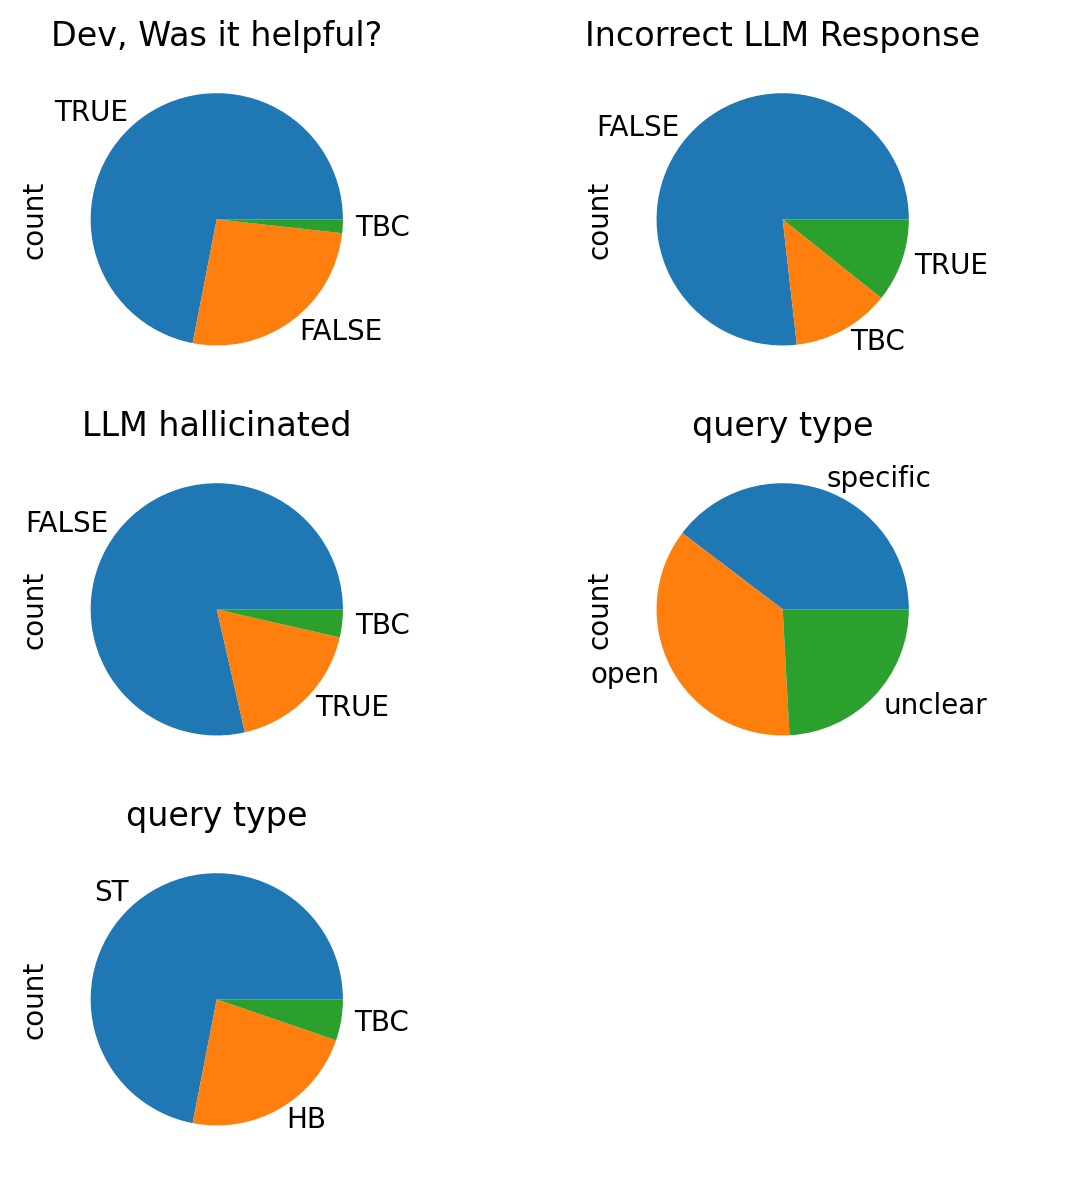

In [15]:
fig, ax =plt.subplots(nrows=3, ncols=2, figsize=(6,6))
df['helpful, software dev'].dropna().value_counts().plot(ax=ax[0,0], kind='pie', title="Dev, Was it helpful?")
df['incorrect information, dev'].dropna().value_counts().plot(ax=ax[0,1], kind='pie', title="Incorrect LLM Response")
df['hallucinated'].dropna().value_counts().plot(ax=ax[1,0], kind='pie', title="LLM hallicinated")
df['query type'].dropna().value_counts().plot(ax=ax[1,1], kind='pie', title="query type")
df['answer belong to ST or HB?'].dropna().value_counts().plot(ax=ax[2,0], kind='pie', title="query type")
ax=ax[2,1].axis('off')
plt.tight_layout()

<Figure size 1000x600 with 0 Axes>

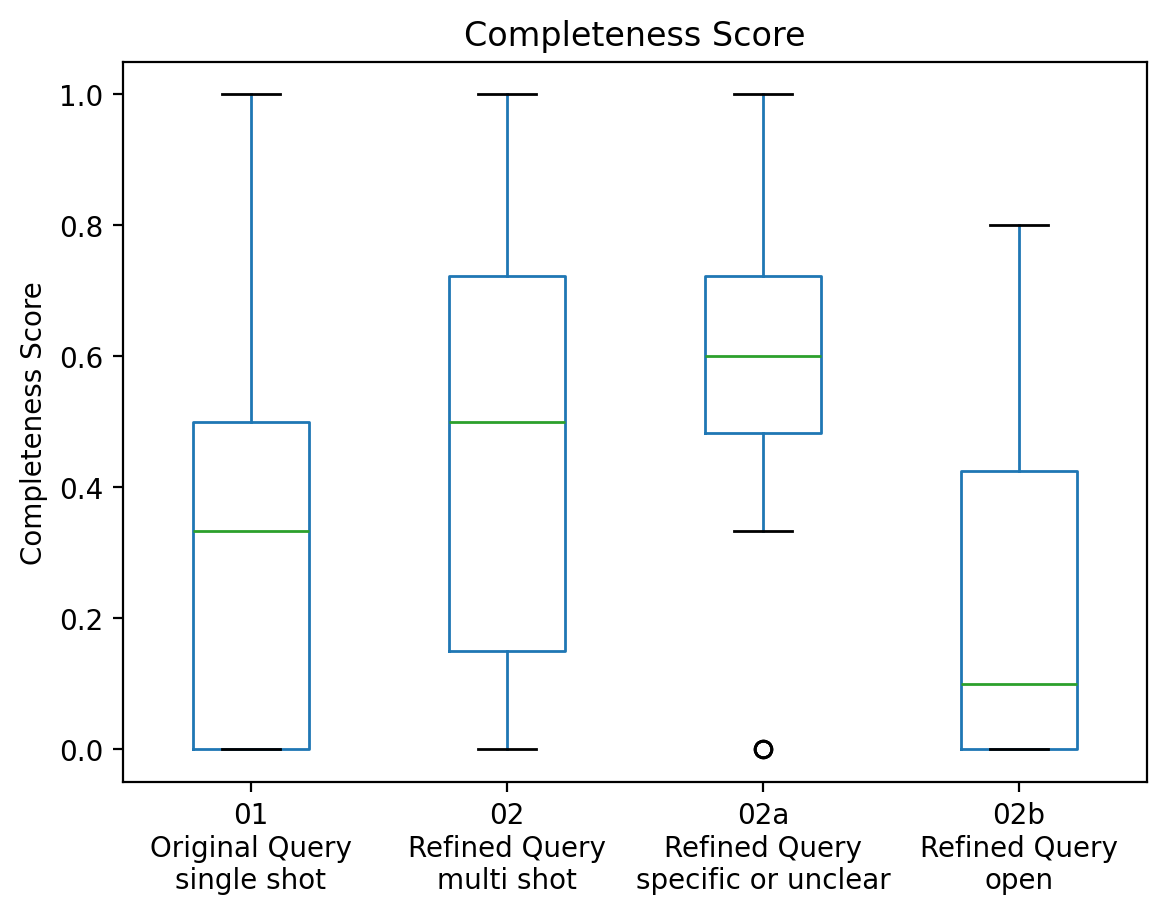

In [16]:
# Filter the data for the first plot
plot_df1 = df[df['Variant'] == 1][['completeness score']].dropna()
plot_df1['Source'] = '01\nOriginal Query\nsingle shot'

# Filter the data for the second plot
plot_df2 = df.groupby(['ID'])[['completeness score']].max().dropna()
plot_df2['Source'] = '02\nRefined Query\nmulti shot'

#plot_df3['Source'] = '03 Iterated Query, specific'
plot_df3 = df[cnd_query_is_specific | cnd_query_is_unclear].groupby(['ID'])[['completeness score']].max().dropna()
plot_df3['Source'] = '02a\nRefined Query\nspecific or unclear'

plot_df4 = df[cnd_query_is_open].groupby(['ID'])[['completeness score']].max().dropna()
plot_df4['Source'] = '02b\nRefined Query\nopen'


# Combine the dataframes
combined_df = pd.concat([plot_df1, plot_df2, plot_df3, plot_df4])

# Plot the combined dataframe
plt.figure(figsize=(10, 6))
combined_df.boxplot(column='completeness score', by='Source', grid=False)
plt.title('Completeness Score')
plt.suptitle('')
plt.xlabel('')
plt.ylabel('Completeness Score')
plt.show()


/var/folders/fg/h81g5sdd74s_cgjhbqgp5bg40000gn/T/ipykernel_18695/2775011077.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df3 = df0[cnd_query_is_specific | cnd_query_is_unclear].groupby(['ID'])[['completeness score']].max().dropna()
/var/folders/fg/h81g5sdd74s_cgjhbqgp5bg40000gn/T/ipykernel_18695/2775011077.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df4 = df0[cnd_query_is_open].groupby(['ID'])[['completeness score']].max().dropna()


<Figure size 1000x600 with 0 Axes>

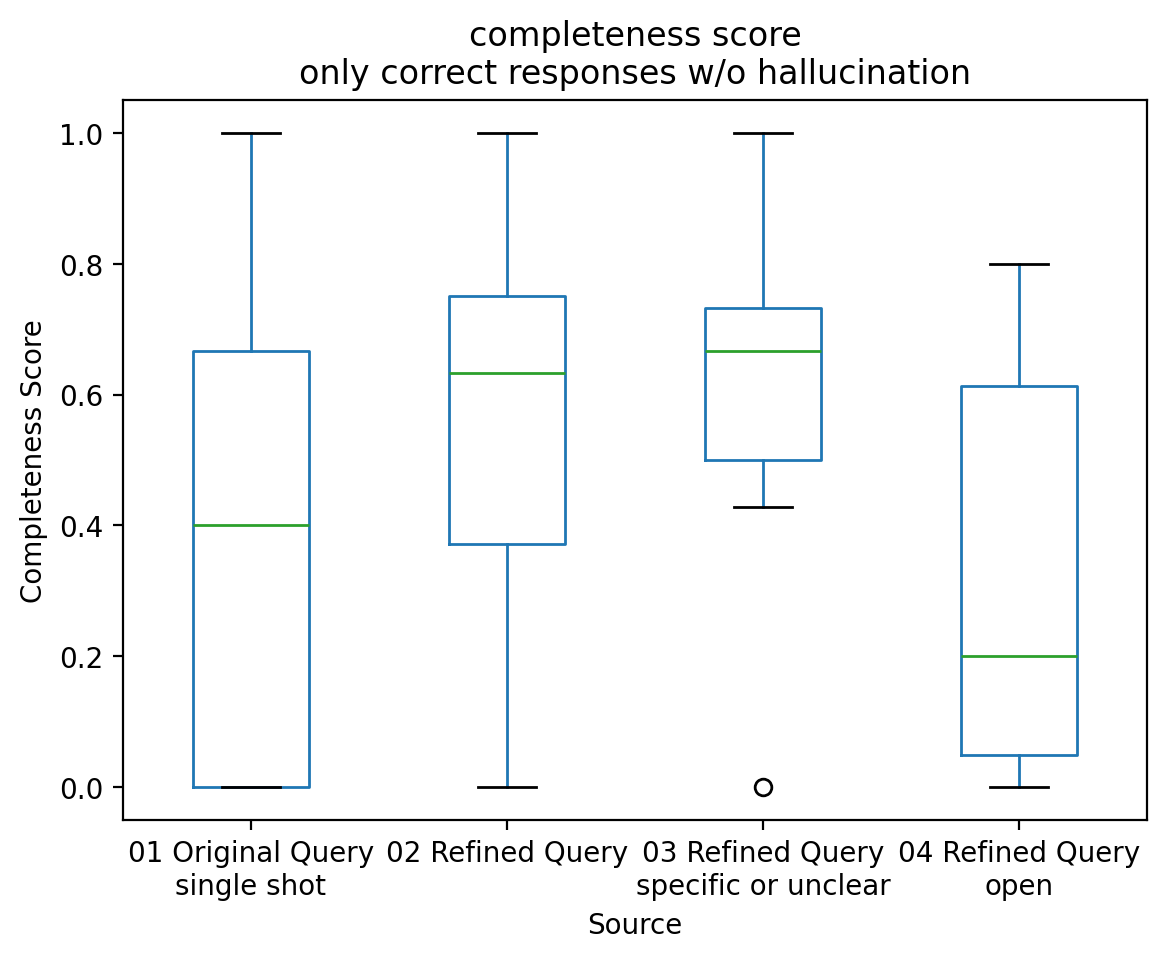

In [17]:
df0 = df[cnd_response_is_correct & cnd_response_is_not_hallucinated]

# Filter the data for the first plot
plot_df1 = df0[df0['Variant'] == 1][['completeness score']].dropna()
plot_df1['Source'] = '01 Original Query\nsingle shot'

# Filter the data for the second plot
plot_df2 = df0.groupby(['ID'])[['completeness score']].max().dropna()
plot_df2['Source'] = '02 Refined Query'

#plot_df3['Source'] = '03 Iterated Query, specific'
plot_df3 = df0[cnd_query_is_specific | cnd_query_is_unclear].groupby(['ID'])[['completeness score']].max().dropna()
plot_df3['Source'] = '03 Refined Query\nspecific or unclear'

plot_df4 = df0[cnd_query_is_open].groupby(['ID'])[['completeness score']].max().dropna()
plot_df4['Source'] = '04 Refined Query\nopen'


# Combine the dataframes
combined_df = pd.concat([plot_df1, plot_df2, plot_df3, plot_df4])

# Plot the combined dataframe
plt.figure(figsize=(10, 6))
combined_df.boxplot(column='completeness score', by='Source', grid=False)
plt.title('completeness score\nonly correct responses w/o hallucination')
plt.suptitle('')
plt.xlabel('Source')
plt.ylabel('Completeness Score')
plt.show()


In [18]:
df.columns
df[['user_name', 'completeness score']].groupby(['user_name']).max().sort_values(by='completeness score', ascending=False)
unique_user = len(df['user_name'].unique().tolist())
unique_queries = df['ID'].unique().shape[0]
print(f'Number of participants: {unique_user}')
print(f'Number of queries {unique_queries}')

Number of participants: 14
Number of queries 67


In [19]:
df[df['Variant']==1][['ID' ,'user_name']].groupby('user_name').count().sort_values(by='ID', ascending=False)

,ID
user_name,
YOUR NAME,35
Tim Peake,5
Chris Hadfield,4
Alan Shepard,3
Michael Collins,3
Neil Armstrong,3
Peggy Whitson,3
Yuri Gagarin,3
Buzz Aldrin,2
